In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
day_data = pd.read_csv(r'/content/drive/MyDrive/SDA/18_Bike-Sharing-Dataset/day.csv')
hour_data = pd.read_csv(r'/content/drive/MyDrive/SDA/18_Bike-Sharing-Dataset/hour.csv')

#**Understand Data**

In [4]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_data.shape

(17379, 17)

In [6]:
day_data.shape

(731, 16)

In [7]:
hour_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit','yr']
number_features = ['temp', 'atemp', 'hum', 'windspeed']
target =['cnt']

In [9]:
print(hour_data[number_features].describe())

               temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean       0.496987      0.475775      0.627229      0.190098
std        0.192556      0.171850      0.192930      0.122340
min        0.020000      0.000000      0.000000      0.000000
25%        0.340000      0.333300      0.480000      0.104500
50%        0.500000      0.484800      0.630000      0.194000
75%        0.660000      0.621200      0.780000      0.253700
max        1.000000      1.000000      1.000000      0.850700


In [10]:
df = hour_data
for col in category_features:
    df[col] = df[col].astype('category')
print(df[category_features].describe())
hour_data[category_features] = hour_data[category_features].astype(int)

        season  holiday   mnth     hr  weekday  workingday  weathersit     yr
count    17379    17379  17379  17379    17379       17379       17379  17379
unique       4        2     12     24        7           2           4      2
top          3        0      7     17        6           1           1      1
freq      4496    16879   1488    730     2512       11865       11413   8734


#**Data Preprocessing**

In [11]:
hour_data['dteday'] = pd.DatetimeIndex(hour_data['dteday']).day
category_features.append('dteday')

In [12]:
hour_data = hour_data.drop(columns=['instant','casual','registered'],axis=1)

In [13]:
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [14]:
hour_data.shape

(17379, 14)

#**Null Value Analysis**

In [15]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


In [16]:
hour_data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#**Data Analysis**

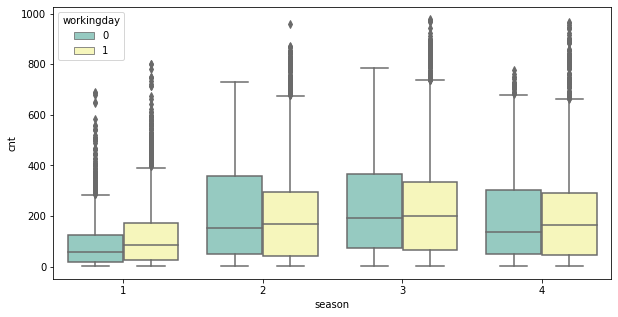

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="season", y="cnt", hue="workingday", data=hour_data, palette="Set3")
plt.show()

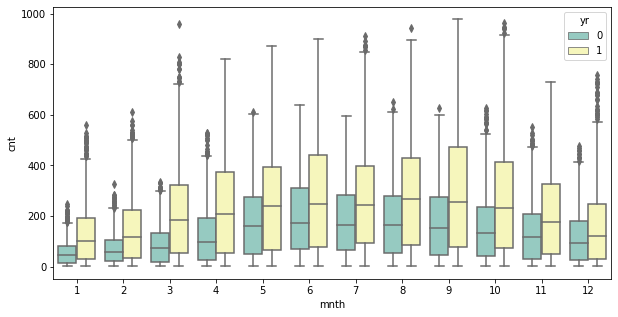

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="mnth", y="cnt", hue="yr", data=hour_data, palette="Set3")
plt.show()

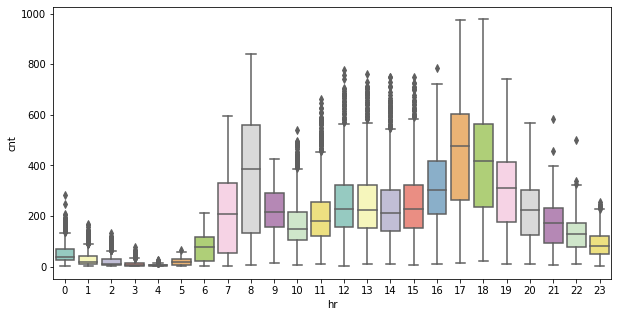

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x="hr", y="cnt", data=hour_data, palette="Set3")
plt.show()

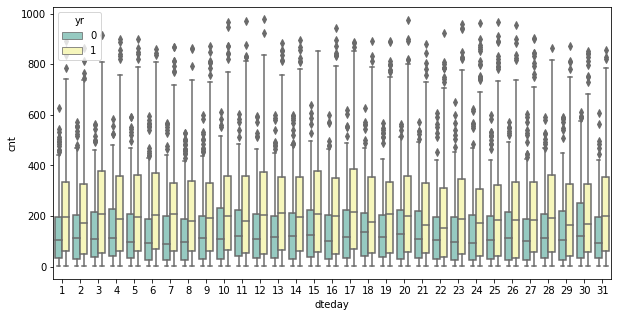

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x="dteday", y="cnt", hue="yr", data=hour_data, palette="Set3")
plt.show()

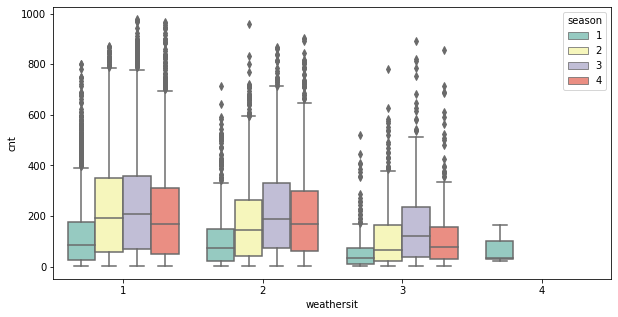

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x="weathersit", y="cnt",hue="season", data=hour_data, palette="Set3")
plt.show()

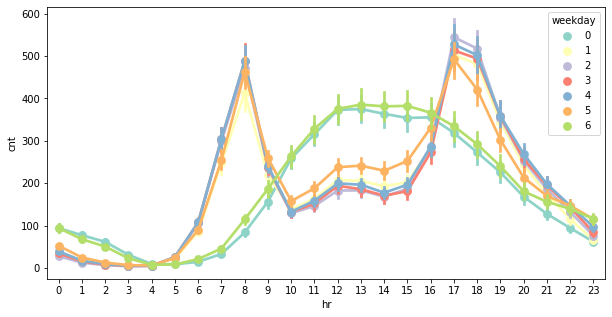

In [22]:
plt.figure(figsize=(10,5))
sns.pointplot(x="hr", y="cnt",hue="weekday", data=hour_data, palette="Set3")
plt.show()

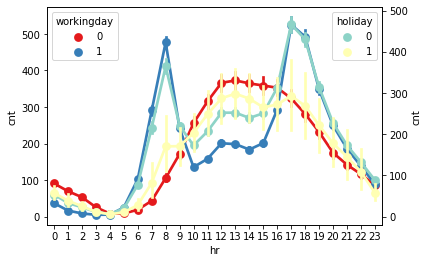

In [23]:
fig, ax = plt.subplots()
sns.pointplot(x="hr", y="cnt",hue="workingday", data=hour_data, palette="Set1", ax=ax)
ax2 = ax.twinx()

sns.pointplot(x="hr", y="cnt",hue="holiday", data=hour_data, palette="Set3",ax=ax2)
plt.show()

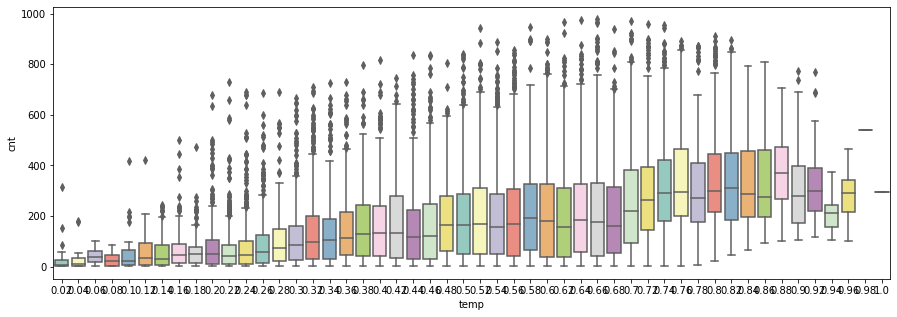

In [24]:
plt.figure(figsize=(15,5))
sns.boxplot(x="temp", y="cnt", data=hour_data, palette="Set3")
plt.show()

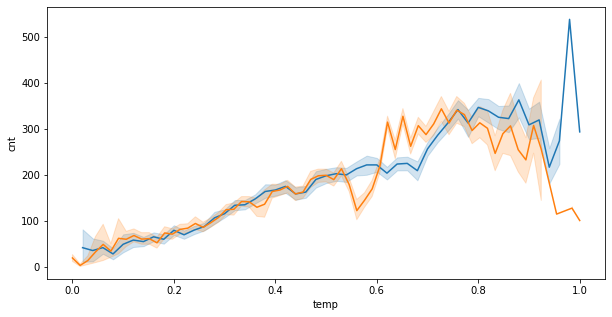

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x="temp", y="cnt", data=hour_data, palette="Set3")
sns.lineplot(x="atemp", y="cnt", data=hour_data, palette="Set3")
plt.show()

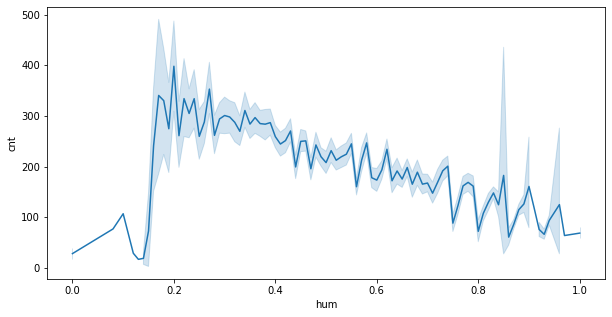

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x="hum", y="cnt", data=hour_data, palette="Set3")
plt.show()

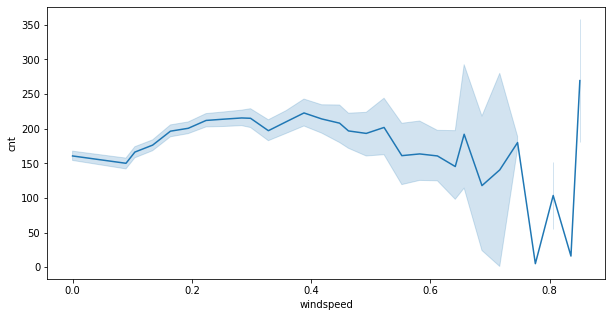

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x="windspeed", y="cnt", data=hour_data, palette="Set3")
plt.show()

#**Outlier Analysis**


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


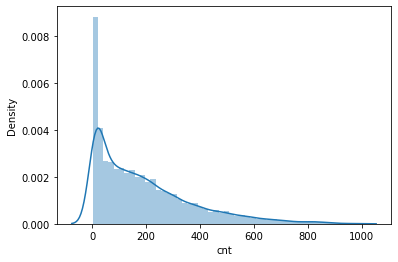

In [28]:
sns.distplot(hour_data[target[-1]]);

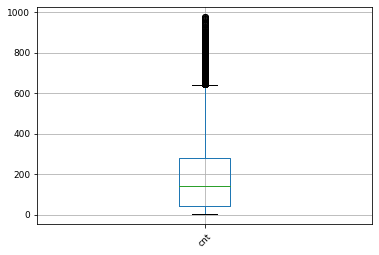

In [29]:
boxplot=hour_data.boxplot(column=[ 'cnt'],rot=45,fontsize=9)

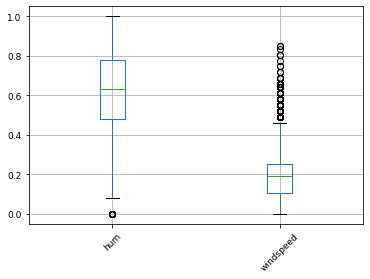

In [30]:
boxplot=hour_data.boxplot(column=[ 'hum', 'windspeed'],rot=45,fontsize=9)

Samples in train set with outliers: 17379
Samples in train set without outliers: 16874


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


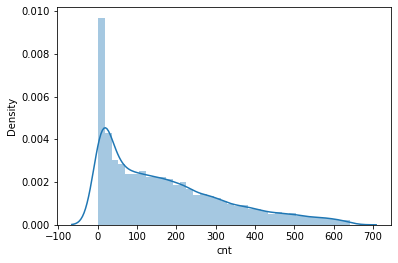

In [31]:
print("Samples in train set with outliers: {}".format(len(hour_data)))
q1 = hour_data.cnt.quantile(0.25)
q3 = hour_data.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
hour_data = hour_data.loc[(hour_data.cnt >= lower_bound) & (hour_data.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(hour_data)))
sns.distplot(hour_data.cnt);

Samples in train set with outliers: 16874
Samples in train set without outliers: 16852


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


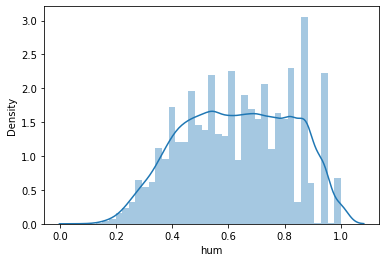

In [32]:
print("Samples in train set with outliers: {}".format(len(hour_data)))
q1 = hour_data.hum.quantile(0.25)
q3 = hour_data.hum.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
hour_data = hour_data.loc[(hour_data.hum >= lower_bound) & (hour_data.hum <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(hour_data)))
sns.distplot(hour_data.hum);

Samples in train set with outliers: 16852
Samples in train set without outliers: 16522


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


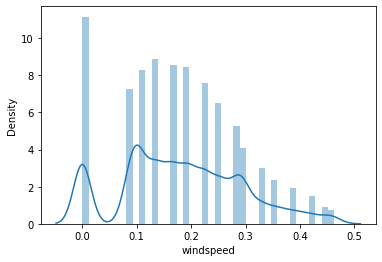

In [33]:
print("Samples in train set with outliers: {}".format(len(hour_data)))
q1 = hour_data.windspeed.quantile(0.25)
q3 = hour_data.windspeed.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
hour_data = hour_data.loc[(hour_data.windspeed >= lower_bound) & (hour_data.windspeed <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(hour_data)))
sns.distplot(hour_data.windspeed);

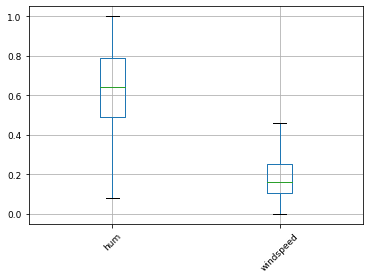

In [34]:
boxplot=hour_data.boxplot(column=[ 'hum', 'windspeed'],rot=45,fontsize=9)

#**Normalisation of target cnt**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


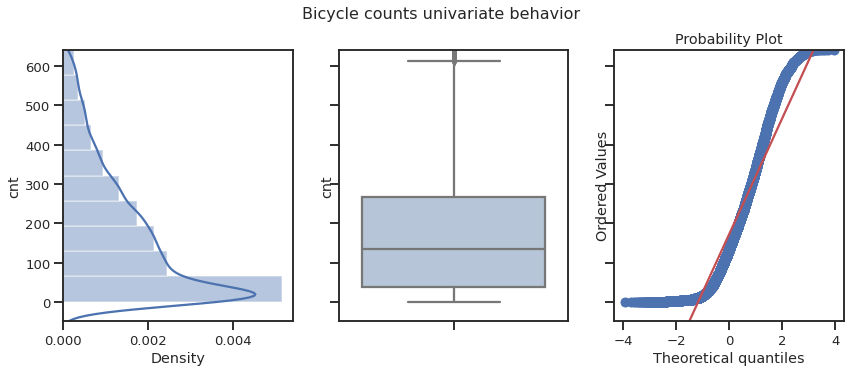

In [35]:
from scipy import stats
 
sns.set( context='talk', style='ticks', font_scale=0.8, rc={'figure.figsize':(14,5)}) 
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.suptitle('Bicycle counts univariate behavior', fontsize=16, y=1)
 
g = sns.distplot(hour_data.cnt, bins=10, vertical=True, ax=axes[0])
g.set_ylim(ymin=hour_data.cnt.min()-50, ymax=hour_data.cnt.max())
g = sns.boxplot(y='cnt', data=hour_data, color='lightsteelblue', ax=axes[1])
g = stats.probplot(hour_data.cnt, dist='norm', fit=True, plot=axes[2])
plt.show()
plt.close('all')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


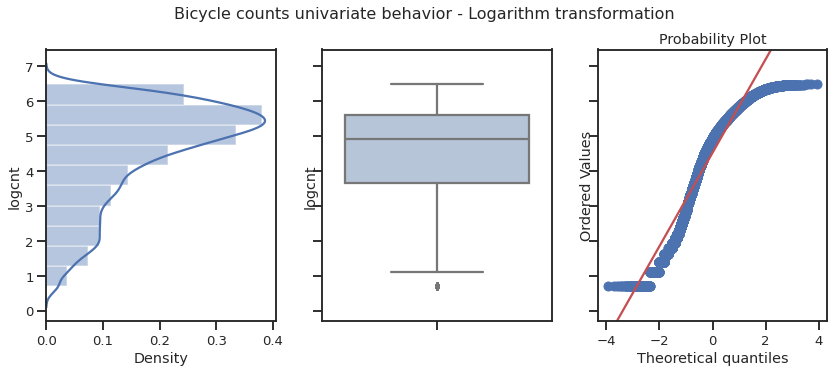

In [36]:
sns.set( context='talk', style='ticks', font_scale=0.8, rc={'figure.figsize':(14,5)}) 
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)
fig.suptitle('Bicycle counts univariate behavior - Logarithm transformation', fontsize=16, y=1)

hour_data['logcnt'] = np.log(hour_data['cnt']+1)
g = sns.distplot(hour_data.logcnt, bins=10, vertical=True, ax=axes[0])
g.set_ylim(ymin=hour_data.logcnt.min()-1, ymax=hour_data.logcnt.max()+1)
g = sns.boxplot(y='logcnt', data=hour_data, color='lightsteelblue', ax=axes[1])
g = stats.probplot(hour_data.logcnt, dist='norm', fit=True, plot=axes[2])
plt.show()
plt.close('all')

In [37]:
hour_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,logcnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,2.833213
1,1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,3.713572
2,1,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,3.496508
3,1,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,2.639057
4,1,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,0.693147


#**Univariate Selection**

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

X = hour_data.iloc[:,0:9]  #independent columns
y = hour_data.iloc[:,-1]    #target column i.e cnt

In [39]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,1,0,1,0,0,6,0,1
1,1,1,0,1,1,0,6,0,1
2,1,1,0,1,2,0,6,0,1
3,1,1,0,1,3,0,6,0,1
4,1,1,0,1,4,0,6,0,1


In [40]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=f_classif, k=5)
fit = bestfeatures.fit(X,y)

In [41]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [42]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs      Score
4          hr  15.314495
1      season   2.277384
2          yr   2.211300
3        mnth   1.627087
7  workingday   1.588520
8  weathersit   1.292832
6     weekday   1.103117
0      dteday   0.951113
5     holiday   0.934325


In [43]:
feature_data =  hour_data.drop(columns=['holiday','dteday','weekday'],axis=1)

#**2 way t test**


In [44]:
from scipy.stats import chi2_contingency 
  
# defining the table 
data = [hour_data['season'], hour_data['mnth']] 
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 1.0
Independent (H0 holds true)


In [45]:
from scipy.stats import chi2_contingency 
  
# defining the table 
data = pd.crosstab(hour_data['holiday'],hour_data['workingday'])
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 4.117973248471021e-233
Dependent (reject H0)


In [46]:
from scipy.stats import chi2_contingency 
  
# defining the table 
data = pd.crosstab(hour_data['weekday'],hour_data['workingday'])
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.0
Dependent (reject H0)


In [47]:
from scipy.stats import chi2_contingency 
  
# defining the table 
data = pd.crosstab(hour_data['season'],hour_data['weathersit'])
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 3.2090155439913444e-33
Dependent (reject H0)


In [48]:
t_value,p_value=stats.ttest_rel(a=hour_data['temp'],b=hour_data['atemp'])
print('p-value:',p_value)
print('t_value:', t_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

p-value: 0.0
t_value: 75.78292177802633
 we are rejecting null hypothesis


#**Correlation Analysis**

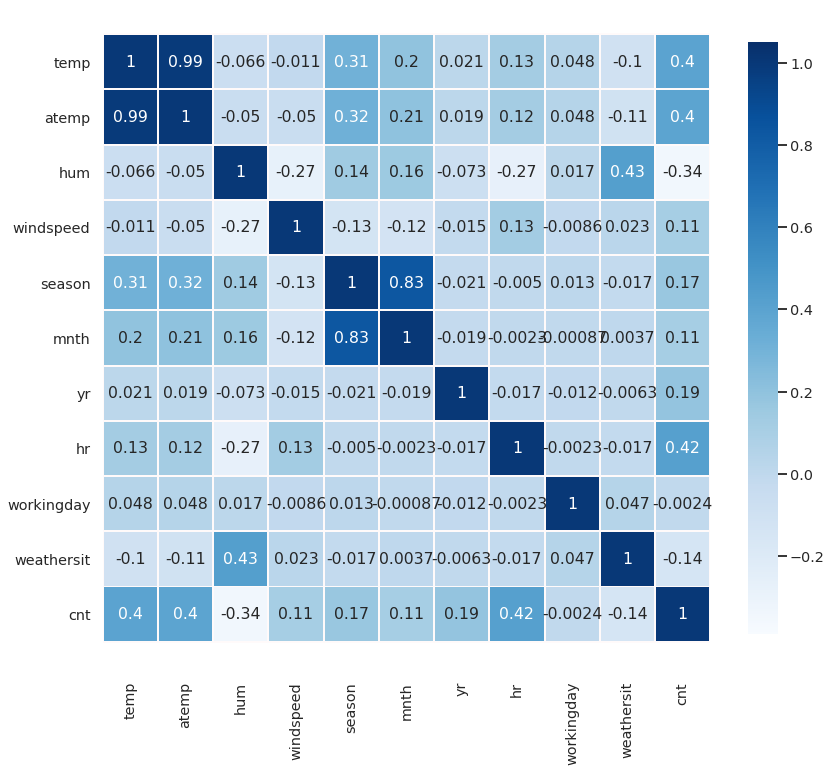

In [49]:
corr_mtx = hour_data[["temp","atemp","hum","windspeed","season","mnth","yr","hr","workingday","weathersit","cnt"]].corr()

w = 14
h = 14
d = 70
sns.set( context='talk', style='whitegrid', font_scale=0.9) 
plt.figure(figsize=(w, h), dpi=d)
ax = sns.heatmap(data=corr_mtx, annot=True, square=True, linewidths=1, linecolor='snow', 
                 vmin=np.nanmin(corr_mtx)-0.05, vmax=np.nanmax(corr_mtx)+0.05,
                 cbar_kws={"shrink": .8}, cmap='Blues')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
plt.close('all')

In [50]:
feature_data =  feature_data.drop(columns=['windspeed','mnth'],axis=1)

In [51]:
feature_data =  feature_data.drop(columns=['cnt'],axis=1)

#**Test of Assumptions**


In [52]:
features = ['temp', 'hum', 'season', 'hr', 'workingday', 'weathersit','yr']
target = ['logcnt']

split_train = int(60 / 100 * len(hour_data)) 
split_val = int(80 / 100 * len(hour_data)) 
train = hour_data[:split_train]
val = hour_data[split_train:split_val]
test = hour_data[split_val:]

x_train = train[features].values
y_train = train[target].values.ravel()
# Sort validation set for plots
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values
y_test = test[target].values.ravel()

In [53]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
result = sm.OLS(y_train, x_train).fit() 
result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1250.
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:24:26   Log-Likelihood:                -14120.
No. Observations:                9913   AIC:                         2.826e+04
Df Residuals:                    9905   BIC:                         2.831e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6937      0.054     49.794      0.000       2.588       2.800
x1             2.0806      0.058     35.745      0.000       1.966       2.195
x2            -1.4353      0.062    -23.037      0.000      -1.557      -1.313
x3             0.1611      0.011     14.968      0.000       0.140       0.182
x4             0.0960      0.002     62.771      0.000       0.093       0.099
x5            -0.0105      0.022     -0.482      0.630      -0.053       0.032
x6             0.0318      0.018      1.801      0.072      -0.003       0.066
x7             0.5261      0.033     16.037      0.000       0.462       0.590
==============================================================================
Omnibus:                      100.258   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.695
Skew:                          -0.245   Prob(JB):                     5.01e-23
Kurtosis:                       2.905   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# fitted values
fitted_y = result.fittedvalues
# model residuals
residuals = result.resid

1. Linearity check

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

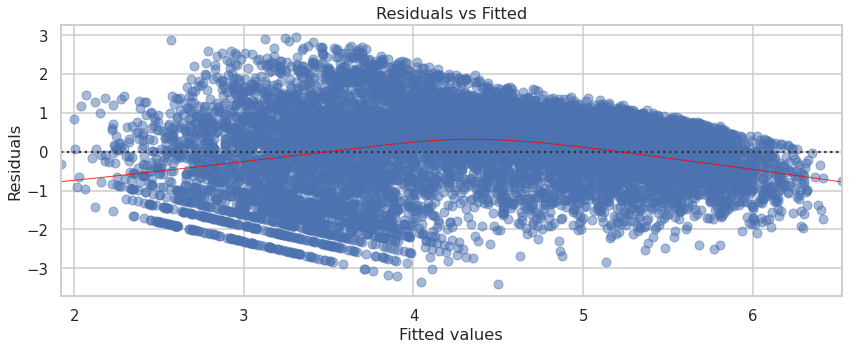

In [55]:
plot_1 = plt.figure()
plot_1.axes[0] = sns.residplot(fitted_y, residuals,
                                       lowess=True,
                                       scatter_kws={'alpha': 0.5},
                                       line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_1.axes[0].set_title('Residuals vs Fitted')
plot_1.axes[0].set_xlabel('Fitted values')
plot_1.axes[0].set_ylabel('Residuals')

2. Normality check

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


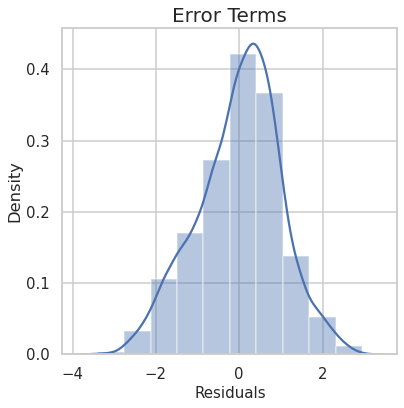

In [56]:
import seaborn as sns
plt.figure(figsize=(6,6))  
sns.distplot(residuals, bins = 10) # you may select the no. of bins
plt.title('Error Terms', fontsize=20)           
plt.xlabel('Residuals', fontsize = 15)  
plt.show()

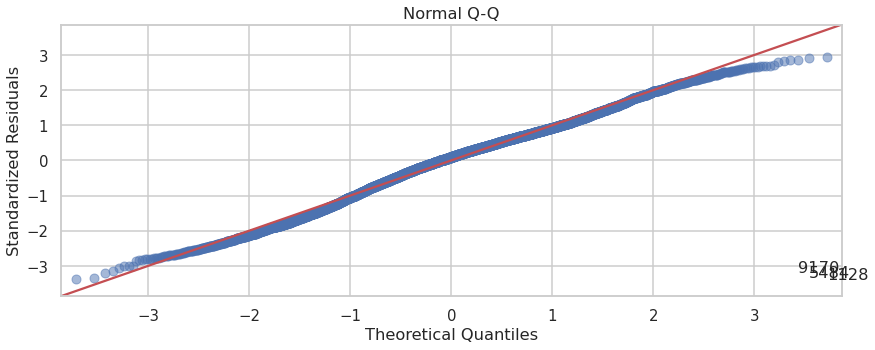

In [57]:
from statsmodels.graphics.gofplots import ProbPlot
residuals_normalized = result.get_influence().resid_studentized_internal
# plt.figure(figsize=(6,6))
qq = ProbPlot(residuals_normalized)
plot_2 = qq.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_2.axes[0].set_title('Normal Q-Q')
plot_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_2.axes[0].set_ylabel('Standardized Residuals')
        # annotations
abs_norm_resid = np.flip(np.argsort(np.abs(residuals_normalized)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_2.axes[0].annotate(i,
                             xy=(np.flip(qq.theoretical_quantiles, 0)[r],
                               residuals_normalized[i]))


3. No or little multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  

  
# the independent variables set 
X = hour_data[['temp', 'hum', 'season', 'hr', 'workingday', 'weathersit','yr']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

      feature        VIF
0        temp   7.507405
1         hum  11.495971
2      season   6.741054
3          hr   3.390411
4  workingday   2.966929
5  weathersit   7.408545
6          yr   1.864638


HomoStadicity

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


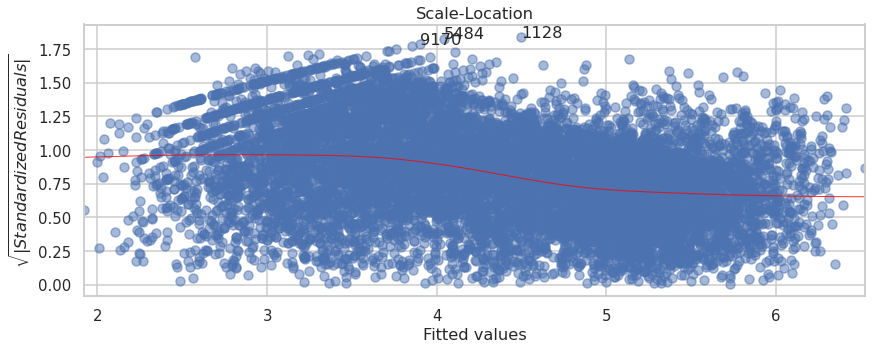

In [59]:
residuals_norm_abs_sqrt = np.sqrt(np.abs(residuals_normalized))
plot_3 = plt.figure()
plt.scatter(fitted_y, residuals_norm_abs_sqrt, alpha=0.5)
sns.regplot(fitted_y, residuals_norm_abs_sqrt,
                  scatter=False,
                  ci=False,
                  lowess=True,
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_3.axes[0].set_title('Scale-Location')
plot_3.axes[0].set_xlabel('Fitted values')
plot_3.axes[0].set_ylabel("$\\sqrt{|Standardized Residuals|}$")

# annotations
abs_sq_norm_resid = np.flip(np.argsort(residuals_norm_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
     plot_3.axes[0].annotate(i,
                              xy=(fitted_y[i],
                              residuals_norm_abs_sqrt[i]))

In [60]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
lzip(name, test)

[('F statistic', 1.130693077623811), ('p-value', 7.838859926151157e-06)]

#**Model Selection**

In [ ]:
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_squared_log_error
# Sklearn models
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
features = ['temp', 'hum', 'season', 'hr', 'workingday', 'weathersit','yr']
target = ['logcnt']

split_train = int(60 / 100 * len(hour_data)) 
split_val = int(80 / 100 * len(hour_data)) 
train = hour_data[:split_train]
val = hour_data[split_train:split_val]
test = hour_data[split_val:]

x_train = train[features].values
y_train = train[target].values.ravel()
# Sort validation set for plots
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values
y_test = test[target].values.ravel()


table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

models = [
    DecisionTreeRegressor(max_depth=5),
    SVR(gamma='auto', kernel='linear'),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300)
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_val)

    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R² score |
+-----------------------+--------------------+----------+
| DecisionTreeRegressor |        0.37        |   0.81   |
|          SVR          |        1.24        |   0.35   |
|         NuSVR         |        0.12        |   0.94   |
| RandomForestRegressor |        0.24        |   0.87   |
+-----------------------+--------------------+----------+


In [ ]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSLE', "R² score"]
# Model training
model = NuSVR(gamma='auto')
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')
evaluate(x_test, y_test, 'test')

print(table)

+-------+------------+------+-------+----------+
| Model |  Dataset   | MSE  | RMSLE | R² score |
+-------+------------+------+-------+----------+
| NuSVR |  training  | 0.12 |  0.09 |   0.94   |
| NuSVR | validation | 0.12 |  0.09 |   0.94   |
| NuSVR |    test    | 0.24 |  0.10 |   0.87   |
+-------+------------+------+-------+----------+


In [ ]:
# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSLE', "R² score"]
# Model training
model = RandomForestRegressor( random_state=0, n_estimators=300)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)

    mse = mean_squared_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))

    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')
evaluate(x_test, y_test, 'test')

print(table)

+-----------------------+------------+------+-------+----------+
|         Model         |  Dataset   | MSE  | RMSLE | R² score |
+-----------------------+------------+------+-------+----------+
| RandomForestRegressor |  training  | 0.02 |  0.04 |   0.99   |
| RandomForestRegressor | validation | 0.24 |  0.11 |   0.87   |
| RandomForestRegressor |    test    | 0.30 |  0.11 |   0.84   |
+-----------------------+------------+------+-------+----------+


In [ ]:
importances =model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hr (0.767552)
2. feature temp (0.095398)
3. feature workingday (0.054132)
4. feature hum (0.033451)
5. feature season (0.021261)
6. feature weathersit (0.016049)
7. feature yr (0.012157)


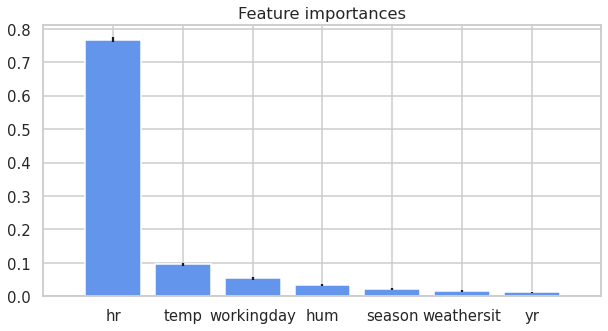

In [ ]:
# Plot the feature importances of the forest
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()